# Daniel Jaso
# HS 608 - Computer Science for Health Informatics
# Project 3: Scientific Programming Exploratory Analysis and Machine Learning 

## Data Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer, MinMaxScaler
file_loc = "/Users/student1/downloads/"
df = pd.read_csv(file_loc + "diabetes_explore2.csv", 
                 delimiter = ",") 

In [2]:
df_ml = df.copy()
df_ml[['pres','plas','skin','insu','mass']] = df_ml[['pres','plas','skin','insu','mass']].replace(0,np.NaN)
df_ml.isnull().sum(axis=0) ## looking for null values within dataset 

preg           0
plas           5
pres          35
skin         227
insu         374
mass          11
pedi           0
age            0
class          0
age_level      0
dtype: int64

### Drop columns skin, insulin, class (target variable) and age level (since this data is already five on the age level and this might cause overfitting on the model.)

In [3]:
X = df_ml.drop(labels=['skin','insu','class', 'age_level'], axis=1) 
y = df_ml['class']
X.isnull().sum(axis=0) ## looking for null values within dataset 

preg     0
plas     5
pres    35
mass    11
pedi     0
age      0
dtype: int64

## Training and Testing
### - Context of this data is a classification problem in order to identify whether or not a person will have diabetes or not based upon these 6 columns/features 

### - Thus this is a classification problem under the supervised learning approach that will be taken, the ML used will be Support Vector Machine (SVM)

### - SVM works for both classification and regression problems. The overview of how this algorithm works is that the data used on the training data set will be used to find the optimal hyperplanes that can be used to classify new data points (test data).

In [4]:
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

537 537
231 231


## Imputation
#### By making use of mean strategy 

In [6]:
imp_x = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_train = imp_x.fit_transform(X_train)# # fit AND transform training set
X_test = imp_x.transform(X_test) # transform test set on scale fitted to training set

/Users/student1/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Scaling Data using MinMax Scaler from Sklearn
###   X (new) = X(i) - X(min) / X(max) - X(min)
### Previously displayed, we observed on the boxplots that our 6 features (pregnancy, plasma (glucose), diastolic blood pressure, mass (BMI), diabetes pedigree function and age) we have outliers that might affect our classifier model 


In [7]:
print (X_test) #compare before/after scaling
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)# fit AND transform training set
X_test_minmax = min_max_scaler.transform(X_test)# test set transform only, no fit
X_test_minmax

[[  0.    131.     66.     34.3     0.196  22.   ]
 [  0.    165.     90.     52.3     0.427  23.   ]
 [  7.    102.     74.     37.2     0.204  45.   ]
 ...
 [  1.    172.     68.     42.4     0.702  28.   ]
 [  5.    158.     84.     39.4     0.395  29.   ]
 [  4.    151.     90.     29.7     0.294  36.   ]]


array([[0.        , 0.56493506, 0.45      , 0.3907767 , 0.04794521,
        0.01666667],
       [0.        , 0.78571429, 0.75      , 0.8276699 , 0.14683219,
        0.03333333],
       [0.41176471, 0.37662338, 0.55      , 0.46116505, 0.05136986,
        0.4       ],
       ...,
       [0.05882353, 0.83116883, 0.475     , 0.58737864, 0.26455479,
        0.11666667],
       [0.29411765, 0.74025974, 0.675     , 0.51456311, 0.13313356,
        0.13333333],
       [0.23529412, 0.69480519, 0.75      , 0.27912621, 0.08989726,
        0.25      ]])

In [8]:
svc = SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True, gamma=1, C=1) 
print (svc) # calls SVC __str__ to view all the attibutes, including the default params you used 
clf = svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax = svc.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax)
print ("Prediction accuracy: ",pTot)

SVC(C=1, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Prediction accuracy:  0.7359307359307359


In [9]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_minmax, labels=[0,1]).ravel()
print(tn, fp, fn, tp)
cm = confusion_matrix(y_test, y_pred_minmax)
print (cm)
report = classification_report(y_test, y_pred_minmax)
print (report) #for each class prints: precision  recall  f1-score   support

113 37 24 57
[[113  37]
 [ 24  57]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       150
           1       0.61      0.70      0.65        81

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.74       231



In [10]:
kernels = ['rbf', 'linear', "poly"]

In [11]:
for kernel in kernels:
    svc = SVC(kernel=kernel, class_weight='balanced', cache_size=1000, probability=True, gamma='scale') 
    print (svc) #  view all the attibutes of SVC used 
    clf = svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
    y_pred_minmax = svc.predict(X_test_minmax) # tests the classifier on the test set
    pTot = accuracy_score(y_test, y_pred_minmax)
    print ("Prediction accuracy: ",pTot)
    cm = confusion_matrix(y_test, y_pred_minmax)
    print (cm)
    report = classification_report(y_test, y_pred_minmax)
    print (report) #for each class prints: precision  recall  f1-score   support

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Prediction accuracy:  0.7359307359307359
[[110  40]
 [ 21  60]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       150
           1       0.60      0.74      0.66        81

    accuracy                           0.74       231
   macro avg       0.72      0.74      0.72       231
weighted avg       0.76      0.74      0.74       231

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Prediction accuracy:  0.7316017316017316
[[116  34]
 [ 28  53]]
              precision    recall  f1-score   support

           

## Paramater Tunning
### SVM parameter tunning with rbf (Radial Basis Function)/Gaussian Kernel, Linear, and Polynomial  kernels while using different paramters within our grid search
###  - C (regularization term): tells the SVM optimization how much you want to avoid miss classifying each training example. Thus, if the C is higher, the optimization will choose smaller margin hyperplane, so training data miss classification rate will be lower.
### - Gamma: The gamma parameter defines how far the influence of a single training example reaches. Thus, the  gamma parameter will consider only points close to the plausible hyperplane and low Gamma will consider points at greater distance.
### - Degree(relevant for poly kernel)

In [12]:
C_range = 10.0 ** np.arange(-4, 4)
gamma_range = [.0001,.001,.01, .1, 1, 10, 100,1000,10000]
print (gamma_range)
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid 

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]


{'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
 'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

### Using RBF Kernel

In [13]:
grid = GridSearchCV(SVC(kernel='rbf',cache_size=1000, probability=True), 
                    param_grid=param_grid, cv = 5) 
grid.fit(X_train_minmax, y_train)
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print ("The best C and gamma for rbf is: %.5f, %.5f " % (best_C, best_gamma))
grid.best_estimator_

The best C and gamma for rbf is: 1.00000, 0.10000 


SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [14]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
pTot = accuracy_score(y_test, best_predict_minmax)
print("Prediction accuracy: ",pTot)
cm = confusion_matrix(y_test, best_predict_minmax)
print (cm)
report = classification_report(y_test, best_predict_minmax)
print (report) 

Prediction accuracy:  0.7619047619047619
[[137  13]
 [ 42  39]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       150
           1       0.75      0.48      0.59        81

    accuracy                           0.76       231
   macro avg       0.76      0.70      0.71       231
weighted avg       0.76      0.76      0.75       231



AUC using predict_proba 0.7964609053497942


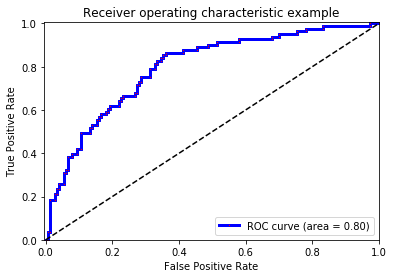

In [15]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of class (patient w diabetes vs no diabetes)
roc_auc = auc(fpr, tpr)
print ("AUC using predict_proba", roc_auc)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') 

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  
plt.ylim([0.0, 1.005])   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Using Linear Kernel

In [16]:
grid = GridSearchCV(SVC(kernel='linear',cache_size=1000, probability=True), 
                    param_grid=param_grid, cv = 5) 
grid.fit(X_train_minmax, y_train)
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print ("The best C and gamma for linear is: %.5f, %.5f " % (best_C, best_gamma))
grid.best_estimator_

The best C and gamma for linear is: 100.00000, 0.00010 


SVC(C=100.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
pTot = accuracy_score(y_test, best_predict_minmax)
print("Prediction accuracy: ",pTot)
cm = confusion_matrix(y_test, best_predict_minmax)
print (cm)
report = classification_report(y_test, best_predict_minmax)
print (report) 

Prediction accuracy:  0.7445887445887446
[[131  19]
 [ 40  41]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



AUC using predict_proba 0.7964609053497942


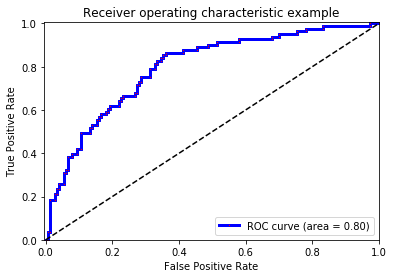

In [18]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of class (patient w diabetes vs no diabetes)
roc_auc = auc(fpr, tpr)
%matplotlib inline
print ("AUC using predict_proba", roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') 

plt.xlim([-0.005, 1.0])  
plt.ylim([0.0, 1.005])   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [19]:
C_range = 10.0 ** np.arange(-2, 4)
gamma_range = [.001,.01, .1, 1, 10]
print (gamma_range)
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid 

[0.001, 0.01, 0.1, 1, 10]


{'gamma': [0.001, 0.01, 0.1, 1, 10],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

### Using Polynomial Kernel
#### Following block of code commented out since the gridsearch on the poly kernel took longer than the previous ones
#### C = .10000 and gamma of 1 were the best estimator obtained

In [20]:
# grid = GridSearchCV(SVC(kernel='poly',cache_size=1000, probability=False, degree=3), 
#                     param_grid=param_grid,cv = 3) 
# grid.fit(X_train_minmax, y_train)
# best_C = grid.best_estimator_.C
# best_gamma = grid.best_estimator_.gamma
# print ("The best C and gamma for poly is: %.5f, %.5f " % (best_C, best_gamma))
# grid.best_estimator_
# best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
# pTot = accuracy_score(y_test, best_predict_minmax)
# print("Prediction accuracy: ",pTot)
# cm = confusion_matrix(y_test, best_predict_minmax)
# print (cm)
# report = classification_report(y_test, best_predict_minmax)
# print (report) 

The best C and gamma for poly is: 0.10000, 1.00000 
Prediction accuracy:  0.7532467532467533
[[139  11]
 [ 46  35]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       150
           1       0.76      0.43      0.55        81

    accuracy                           0.75       231
   macro avg       0.76      0.68      0.69       231
weighted avg       0.75      0.75      0.73       231



In [21]:
svc = SVC(kernel='poly', class_weight='balanced', cache_size=1000, probability=True, degree=3, C=0.10000, gamma=1) 
print (svc) # calls SVC __str__ to view all the attibutes, including the default params you used 
clf = svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax = svc.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax)
print ("Prediction accuracy: ",pTot)
cm = confusion_matrix(y_test, y_pred_minmax)
print (cm)
report = classification_report(y_test, y_pred_minmax)
print (report) #for each class prints: precision  recall  f1-score   support

SVC(C=0.1, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Prediction accuracy:  0.7532467532467533
[[129  21]
 [ 36  45]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.56      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



AUC using predict_proba 0.8131687242798353


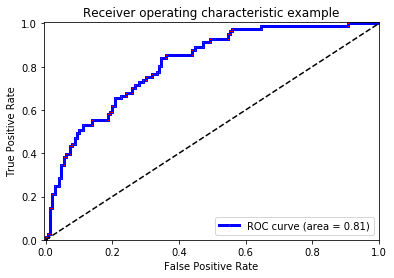

In [22]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of class (patient w diabetes vs no diabetes)
roc_auc = auc(fpr, tpr)
%matplotlib inline
print ("AUC using predict_proba", roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') 

plt.xlim([-0.005, 1.0])  
plt.ylim([0.0, 1.005])   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Summary

### From the screenshots displayed below, we can see that the model that had the highest accuracy was the RBF kernel. Although, accuracy is not everything in order to evaluate which model is better, rather we need to see at metrics that incorporate precision, recall (sensitivity). F1-score measure since the formula account for both of these metrics. 

### F1 = (2 * Recall * Precision)/(Recall + Precision)

### This measure tells us a mid point with these metric, also the fact that we can to account for how well our model classify our True Negatives and True Positives that are accounted on the ROC curve. Thus, for both F1 and ROC curve for the Poly kernel seems to be the approriate model that meets both conditions.

#### Note: classification report spits out macro avg and weighted avg, we want to make reference of the weighted avg because weighted avg takes into accoutn for the imbalance data on our target variable

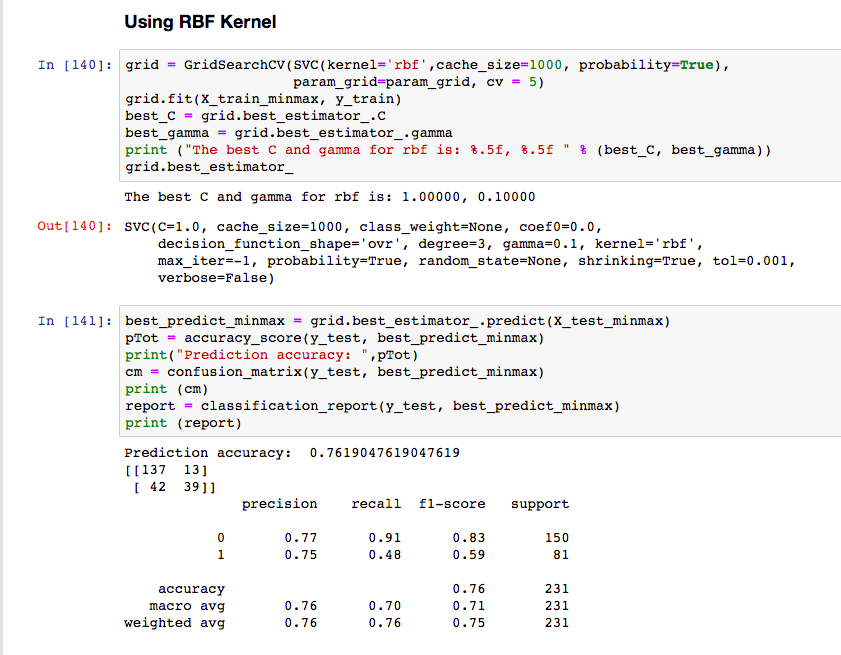

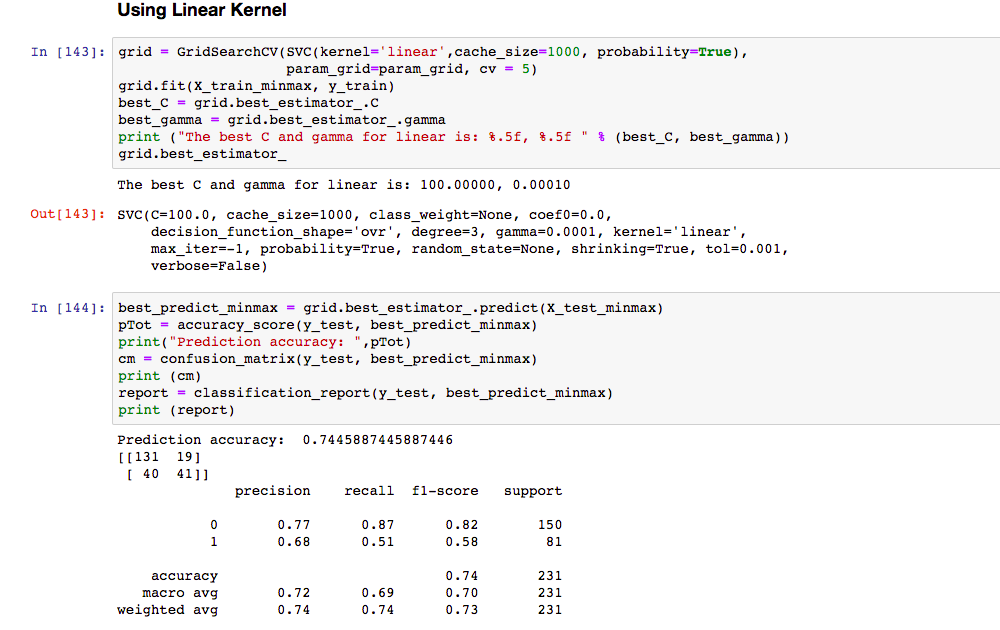

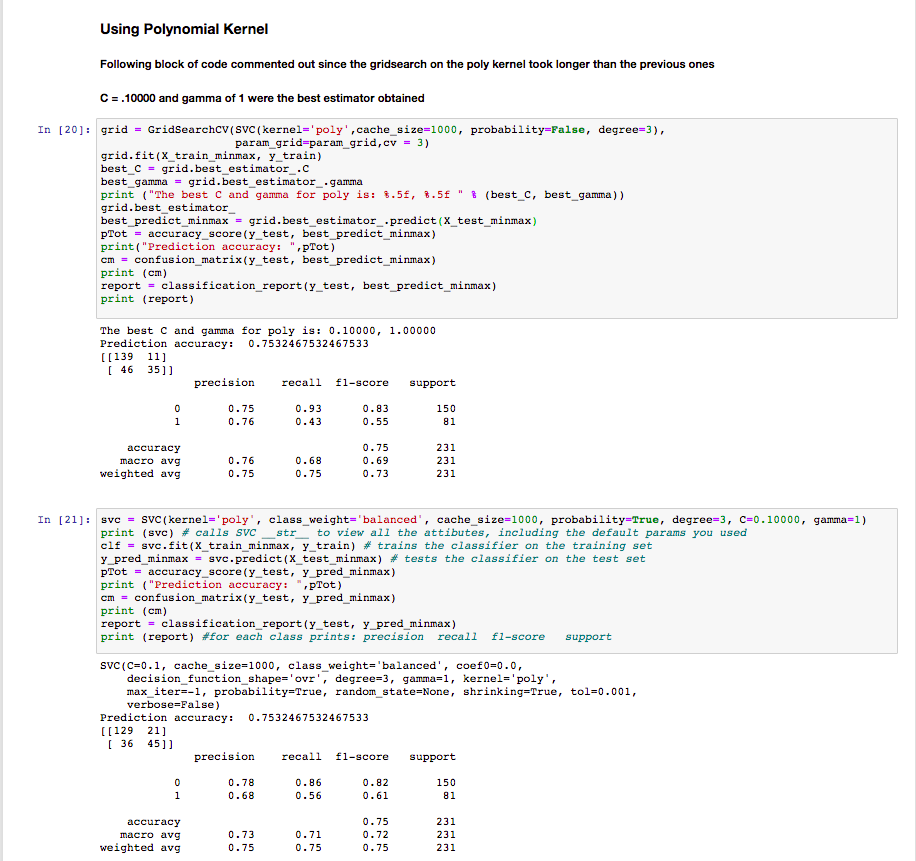